In [1]:
from utils import generate_real_world_pandas
import ploting as draw
import random
import numpy as np
import pandas as pd

In [4]:
def add_noise_old(tv, errRange = 1, mutation_rate = 0):
    
    def add_unc_single_value(tv, errRange, mutation_rate):
        rv = random.random() if random.random() < mutation_rate else tv 
        rv += errRange * random.uniform(-1, 1)
        return rv
    
    def add_unc_array(tv, errRange, mutation_rate):
        rv = []
        for t in tv:
            rv.append(add_unc_single_value(t, errRange, mutation_rate))
        return np.array(rv)
    
    try:
        iter(tv)
    except:
        _add_unc = add_unc_single_value
    else:
        _add_unc = add_unc_array
    
    return _add_unc(tv, errRange, mutation_rate)

In [5]:
def add_noise_old2(world, errRange = 1, mutation_rate = 0):
    _, n_feat = world[:, 1:].shape
    for i, cls_feat in enumerate(world):
        mutation = True if random.random() < mutation_rate else False
        if mutation:
            for j in range(1, n_feat + 1):
                cls_feat[j] = random.random() + errRange * random.uniform(-1, 1)
        else:
            for j in range(1, n_feat + 1):
                cls_feat[j] += errRange * random.uniform(-1, 1)
        world[i] = cls_feat
    return world

In [2]:
import matplotlib.pyplot as plt

def draw_combined_world(data, cmap='viridis'):    
    # Extracting data for the true world
    true_classes = data["Class"]
    true_f1 = data["True Value 1"]
    true_f2 = data["True Value 2"]
    
    # Extracting data for the real worlds
    real_f1 = data["Real Value 1"]
    real_f2 = data["Real Value 2"]
    
    # Extracting data for the observed worlds
    observed_f1 = data["Observed Value 1"]
    observed_f2 = data["Observed Value 2"]
    
    minf1 = np.min([true_f1, real_f1, observed_f1])
    maxf1 = np.max([true_f1, real_f1, observed_f1])
    minf2 = np.min([true_f2, real_f2, observed_f2])
    maxf2 = np.max([true_f2, real_f2, observed_f2])
    
    # Creating subplots
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
        
    axs[0].set_xlim(minf1, maxf1)
    axs[1].set_xlim(minf1, maxf1)
    axs[2].set_xlim(minf1, maxf1)
    
    axs[0].set_ylim(minf2, maxf2)
    axs[1].set_ylim(minf2, maxf2)
    axs[2].set_ylim(minf2, maxf2)
    
    # True World
    axs[0].scatter(true_f1, true_f2, c=true_classes, cmap=cmap, edgecolor='k', marker='o')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 2')
    axs[0].set_title('True World')
    
    # Real World
    axs[1].scatter(real_f1, real_f2, c=true_classes, cmap=cmap, edgecolor='k', marker='o')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')
    axs[1].set_title('Real World')
    
    # Observed World
    axs[2].scatter(observed_f1, observed_f2, c=true_classes, cmap=cmap, edgecolor='k', marker='o')
    axs[2].set_xlabel('Feature 1')
    axs[2].set_ylabel('Feature 2')
    axs[2].set_title('Observed World')
    
    plt.tight_layout()
    
    # Display the plot
    plt.show()

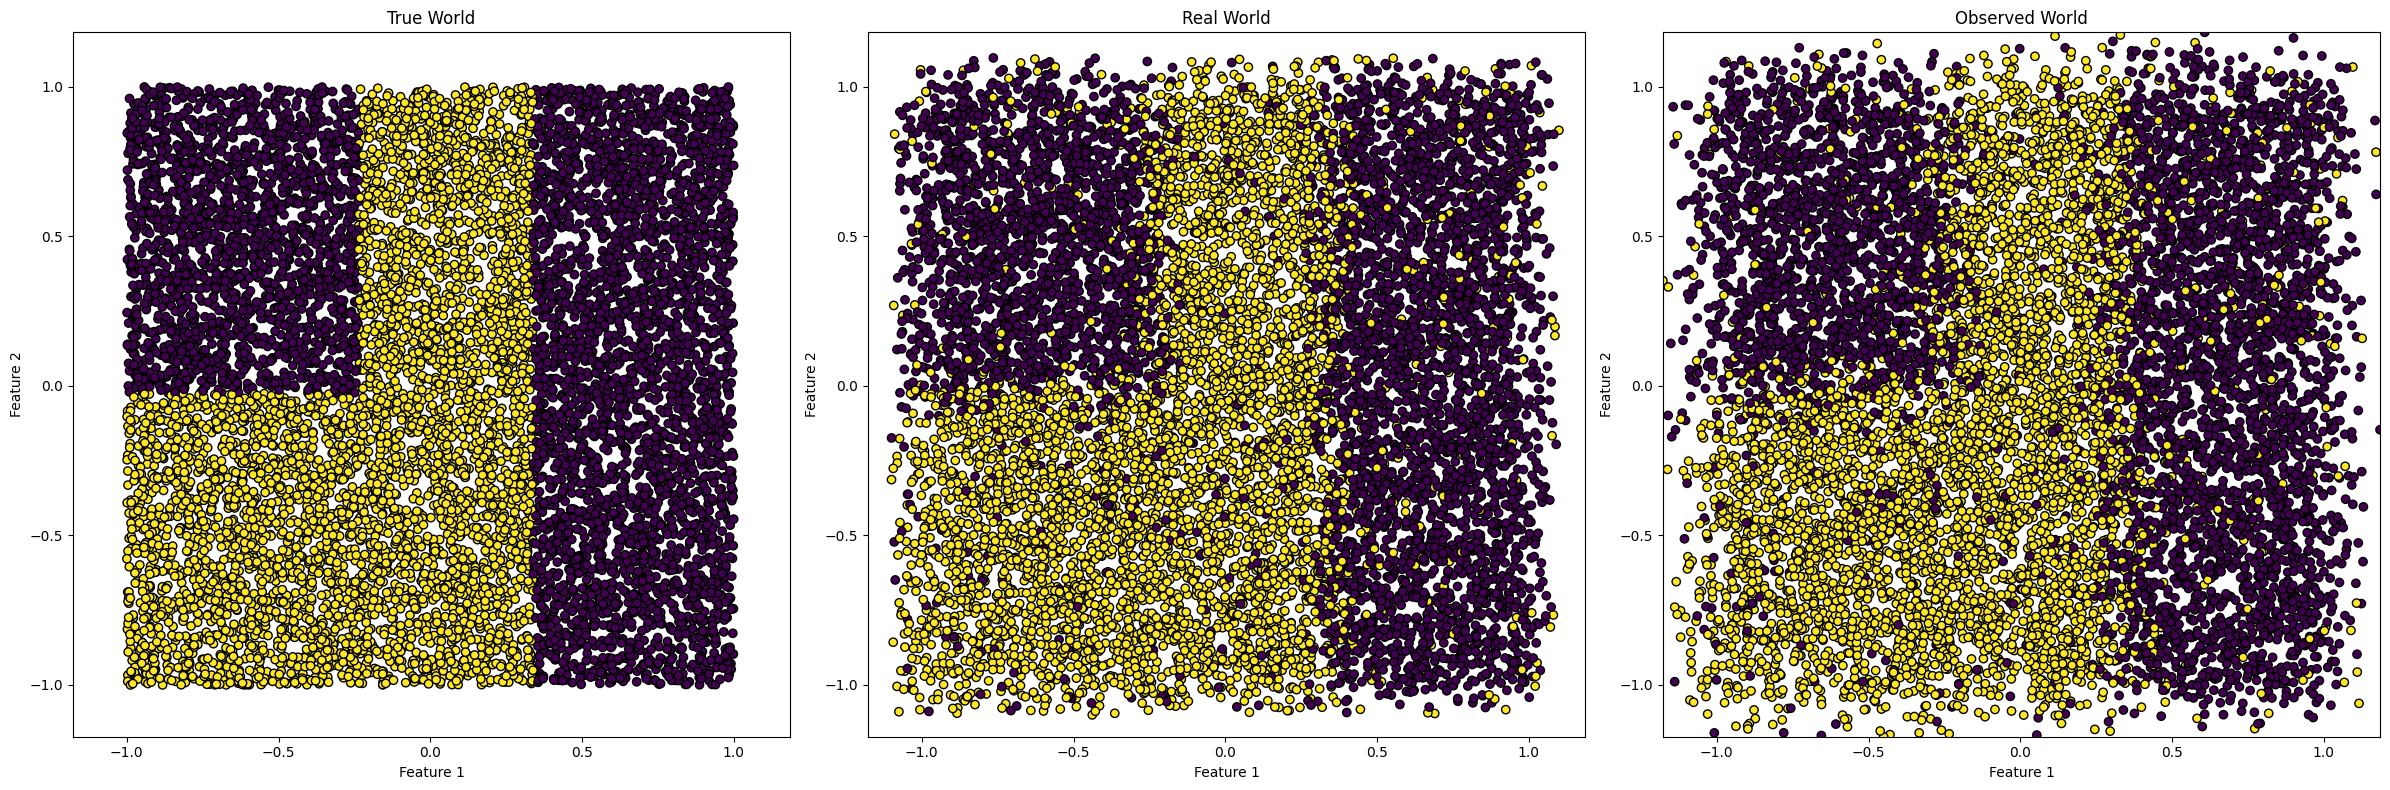

In [6]:
world = generate_real_world_pandas(
    world_seed=4, data_seed=1, 
    features=2, no_samples=10**4, feature_bounds=(-1, 1),
    equal_classes=False,
    errRange=0.1, corr=1,
    errRange_real_world = 0.1, corr_real_world = 1, mutation_rate = 0.1)
# print(world)
# world = add_noise(world, errRange=0.05, mutation_rate=0.1)
# r = 0.9
# y1 = r*world[:, 1]+np.sqrt(1-r*r)*world[:, 1] 
# world = np.c_[world, add_noise(world[:, 1], errRange=0.05, mutation_rate=0.1)]
# world = np.c_[world, add_noise(world[:, 2], errRange=0.05, mutation_rate=0.1)]

# world[:, 1] = add_noise(world[:, 1], errRange=0.05, mutation_rate=0.1)
# world[:, 2] = add_noise(world[:, 2], errRange=0.05, mutation_rate=0.1)

# print(np.corrcoef(world[:, 1], world[:, 3])[0, 1])
draw_combined_world(world)

In [69]:
np.corrcoef(np.abs(world["Error 1"]), world["Uncertainty 1"])[0,1]

0.9999999999999989